In [1]:
import numpy as np
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc
from IPython.display import HTML
import pgmpy as pgm
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, TSNE
import useful
from pygame import mixer
import os
os.chdir('..')
import midivectors

pygame 1.9.5
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 9]
matplotlib.rcParams['figure.dpi'] = 50

In [3]:
data = np.load('data/chorales_vectors_12_32.npy')
data.shape

(1764, 384)

In [5]:
pca = PCA(n_components=384)
data_tr = pca.fit_transform(data)

In [6]:
data_tr.shape

(1764, 384)

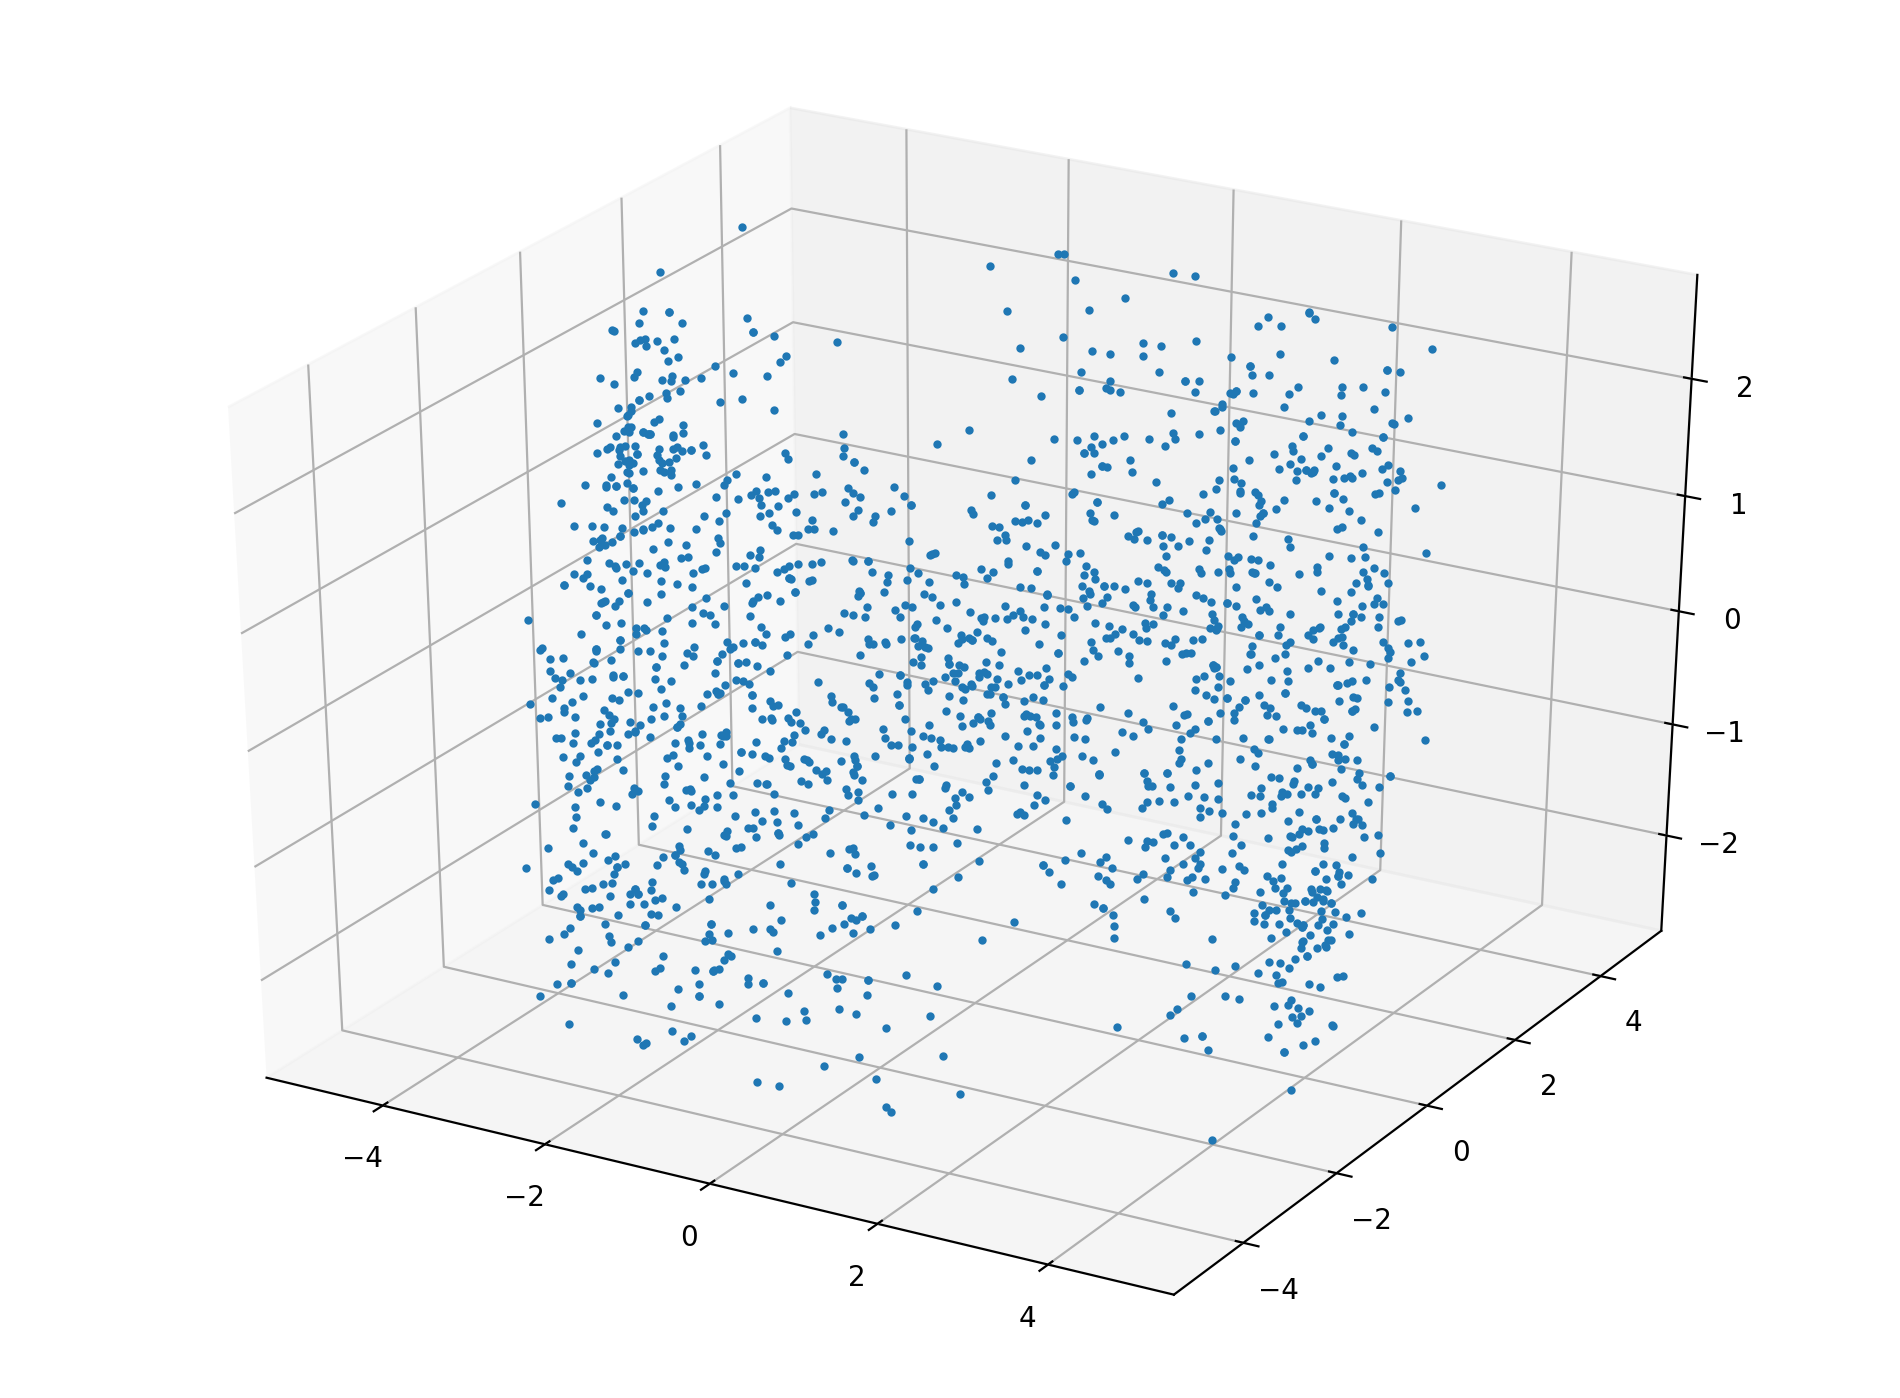

In [7]:
import useful

useful.scatter_3d(
    data_tr[:, :3].T, 
    rcParams=matplotlib.rcParams)

In [8]:
LLE = LocallyLinearEmbedding(n_components = 10)
data_LLE = LLE.fit_transform(data_tr)
data_LLE.shape

(1764, 10)

In [19]:
pca_space = np.random.choice(data_tr)

data_space = pca.inverse_transform(pca_space)
data_space = np.where(data_space > .5, 1, 0)

point = midivectors.stacked_vector_to_matrix(data_space, octaves=1)
print("Difference from original data:", np.sum(np.abs(data_space - data[1000])))

65

In [20]:
midivectors.matrix_to_midi(point, 4, bpm=60, hold_notes=True).save('my_new_composition.mid')
mixer.init()
mixer.music.load('my_new_composition.mid')
mixer.music.play()